In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3
%matplotlib inline

In [2]:
movie_gross = pd.read_csv("../Data/bom.movie_gross.csv")
movie_gross.head()

#Domestic Gross and Foreign Gross are hard to read, because numbers are very large, we should adjust the values
#probably by making new columns as domestic_gross_mil and foreign_gross_mil

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movie_gross.info()
#foriegn_gross has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#List of Tables
conn = sqlite3.connect("../Data/im.db")
sql_query = """
SELECT name FROM sqlite_master  
WHERE type='table';
"""
pd.read_sql(sql_query,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
#Person table
q = """
SELECT * FROM persons
"""
persons_df = pd.read_sql(q, conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [6]:
persons_df.info()
# Missing many many death years, missing many birth years, missing quite a few 
# primary professions, no missing person_id or primary_name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [7]:
q = """
SELECT * FROM writers
"""
writers_df = pd.read_sql(q, conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [8]:
writers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [9]:
# Many to many bridge table with no missing values

In [10]:
q = """
SELECT * FROM directors
"""
directors_df = pd.read_sql(q, conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [11]:
directors_df.info()
# Many to many bridge table with no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [12]:
q = """
SELECT * FROM known_for
"""
known_for_df = pd.read_sql(q, conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [13]:
known_for_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [14]:
# Many to many bridge table with no missing values

In [15]:
q = """
SELECT * FROM principals
"""
principals_df = pd.read_sql(q, conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [16]:
principals_df.info()
#nulls in job and character columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [17]:
principals_df[principals_df['category'] == 'actor'].info()

#actors don't have non-null values under jobs
#some actors have null values under the character column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256718 entries, 0 to 1028181
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie_id    256718 non-null  object
 1   ordering    256718 non-null  int64 
 2   person_id   256718 non-null  object
 3   category    256718 non-null  object
 4   job         0 non-null       object
 5   characters  204551 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [18]:
q = """
SELECT * FROM movie_basics
"""
movie_basics_df = pd.read_sql(q, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
movie_basics_df.info()
#some movies don't have genres
#some movies don't have runtime_minutes values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [20]:
q = """
SELECT * FROM movie_ratings
"""
movie_ratings_df = pd.read_sql(q, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
movie_ratings_df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
q = """
SELECT * FROM movie_akas
"""
movie_akas_df = pd.read_sql(q, conn)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [23]:
movie_akas_df.info()
#null values under region, language, types, and attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [24]:
rt_movie_info = pd.read_table("../Data/rt.movie_info.tsv")
rt_movie_info.head()
#need to figure out how to relate this database to a table, maybe id realted to movie_id in another database

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [25]:
rt_movie_info.info()
# some synopsis null value: director null values, writer null values, theatre_date, dvd_date, currency, box_office,
# runtime, and studio


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [26]:
rt_reviews = pd.read_table("../Data/rt.reviews.tsv", encoding = 'latin-1')
rt_reviews.head()
#rating given out of 5 stored as string, might be best to just look at the numerator instead of storing as a fraction
#in a string
#again, id looks like it might connect to other tables hopefully

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [27]:
rt_reviews.info()
#null values: review, rating, critic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [28]:
movies = pd.read_csv("../Data/tmdb.movies.csv")
movies.head()
# Need something to translate the genre ids 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
movies.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [30]:
movie_budgets = pd.read_csv("../Data/tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Taking a look at box office numbers by genre

In [32]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [33]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [34]:
rt_movie_info['genre']

0                     Action and Adventure|Classics|Drama
1                       Drama|Science Fiction and Fantasy
2                       Drama|Musical and Performing Arts
3                              Drama|Mystery and Suspense
4                                           Drama|Romance
                              ...                        
1555     Action and Adventure|Horror|Mystery and Suspense
1556                   Comedy|Science Fiction and Fantasy
1557    Classics|Comedy|Drama|Musical and Performing Arts
1558      Comedy|Drama|Kids and Family|Sports and Fitness
1559    Action and Adventure|Art House and Internation...
Name: genre, Length: 1560, dtype: object

In [35]:
#first make the 'genre' column a list of strings instead of one big string
genres = rt_movie_info['genre']
rt_movie_info['genre'] = genres.str.split(pat="|")
rt_movie_info['genre']

0                 [Action and Adventure, Classics, Drama]
1                    [Drama, Science Fiction and Fantasy]
2                    [Drama, Musical and Performing Arts]
3                           [Drama, Mystery and Suspense]
4                                        [Drama, Romance]
                              ...                        
1555    [Action and Adventure, Horror, Mystery and Sus...
1556                [Comedy, Science Fiction and Fantasy]
1557    [Classics, Comedy, Drama, Musical and Performi...
1558    [Comedy, Drama, Kids and Family, Sports and Fi...
1559    [Action and Adventure, Art House and Internati...
Name: genre, Length: 1560, dtype: object

In [36]:
rt_movie_genres = pd.get_dummies(rt_movie_info['genre'].apply(pd.Series).stack()).sum(level=0)
rt_movie_genres

,Action and Adventure,Animation,Anime and Manga,Art House and International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith and Spirituality,...,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1556,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1557,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1558,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
rt_movie_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1559
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Action and Adventure         1552 non-null   uint8
 1   Animation                    1552 non-null   uint8
 2   Anime and Manga              1552 non-null   uint8
 3   Art House and International  1552 non-null   uint8
 4   Classics                     1552 non-null   uint8
 5   Comedy                       1552 non-null   uint8
 6   Cult Movies                  1552 non-null   uint8
 7   Documentary                  1552 non-null   uint8
 8   Drama                        1552 non-null   uint8
 9   Faith and Spirituality       1552 non-null   uint8
 10  Gay and Lesbian              1552 non-null   uint8
 11  Horror                       1552 non-null   uint8
 12  Kids and Family              1552 non-null   uint8
 13  Musical and Performing Arts  1552 non-null   uin

In [38]:
rt_movie_info2 = pd.concat([rt_movie_info['box_office'], rt_movie_genres], axis = 1)
rt_movie_info2.head()

,box_office,Action and Adventure,Animation,Anime and Manga,Art House and International,Classics,Comedy,Cult Movies,Documentary,Drama,...,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western
0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"600,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
rt_movie_info2['box_office'] = rt_movie_info2['box_office'].fillna('0')
rt_movie_info2['box_office'] = rt_movie_info2['box_office'].str.replace(',', '').astype(int)

In [40]:
rt_movie_info2 = rt_movie_info2.mask(rt_movie_info2 == 1, rt_movie_info2['box_office'], axis = 0)
rt_movie_info2 = rt_movie_info2.fillna(0)
rt_movie_info2

,box_office,Action and Adventure,Animation,Anime and Manga,Art House and International,Classics,Comedy,Cult Movies,Documentary,Drama,...,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600000.0,...,0.0,0.0,0.0,0.0,0.0,600000.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,33886034,33886034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33886034.0,0.0,0.0,33886034.0,0.0,0.0,0.0,0.0,0.0,0.0
1556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1557,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1558,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
genres = rt_movie_info2.columns[1:]
genres

Index(['Action and Adventure', 'Animation', 'Anime and Manga',
       'Art House and International', 'Classics', 'Comedy', 'Cult Movies',
       'Documentary', 'Drama', 'Faith and Spirituality', 'Gay and Lesbian',
       'Horror', 'Kids and Family', 'Musical and Performing Arts',
       'Mystery and Suspense', 'Romance', 'Science Fiction and Fantasy',
       'Special Interest', 'Sports and Fitness', 'Television', 'Western'],
      dtype='object')

In [55]:
rt_movie_info2.loc[rt_movie_info2['Animation'] != 0]['Animation'].mean()

56192457.84210526

In [85]:
genre_dict = {}
for genre in genres: 
    if pd.isna(rt_movie_info2.loc[rt_movie_info2[genre] != 0][genre].mean()) == False:
        genre_dict[genre] = rt_movie_info2.loc[rt_movie_info2[genre] != 0][genre].mean()
genre_dict

{'Action and Adventure': 62328750.278481014,
 'Animation': 56192457.84210526,
 'Art House and International': 2222097.6764705884,
 'Classics': 6750000.0,
 'Comedy': 41910959.925925925,
 'Cult Movies': 13900000.0,
 'Documentary': 11856477.2,
 'Drama': 28253760.685,
 'Faith and Spirituality': 5380785.333333333,
 'Horror': 26385680.37037037,
 'Kids and Family': 54699971.375,
 'Musical and Performing Arts': 10925906.294117646,
 'Mystery and Suspense': 42554923.81818182,
 'Romance': 48266597.78571428,
 'Science Fiction and Fantasy': 80947872.53125,
 'Special Interest': 3101609.888888889,
 'Sports and Fitness': 21241679.0,
 'Television': 13456838.333333334,
 'Western': 14436168.5}

[Text(0, 0, 'Action and Adventure'),
 Text(1, 0, 'Animation'),
 Text(2, 0, 'Art House and International'),
 Text(3, 0, 'Classics'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Cult Movies'),
 Text(6, 0, 'Documentary'),
 Text(7, 0, 'Drama'),
 Text(8, 0, 'Faith and Spirituality'),
 Text(9, 0, 'Horror'),
 Text(10, 0, 'Kids and Family'),
 Text(11, 0, 'Musical and Performing Arts'),
 Text(12, 0, 'Mystery and Suspense'),
 Text(13, 0, 'Romance'),
 Text(14, 0, 'Science Fiction and Fantasy'),
 Text(15, 0, 'Special Interest'),
 Text(16, 0, 'Sports and Fitness'),
 Text(17, 0, 'Television'),
 Text(18, 0, 'Western')]

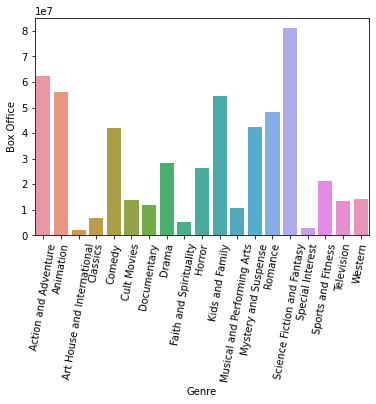

In [93]:
fig, ax = plt.subplots()
keys = list(genre_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = list(genre_dict.values())
sns.barplot(x=keys, y=vals)
ax.set_xlabel('Genre')
ax.set_ylabel("Box Office")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)